In [1]:
import hist
import numpy as np
import cloudpickle
import zlib
import matplotlib.pyplot as plt

In [23]:
pathResults = "/gwdata/users/gpizzati/condor_processor/results/"
with open(f"{pathResults}/results_merged.pkl", "rb") as file:
    results = cloudpickle.loads(zlib.decompress(file.read()))
results = results["results"]

In [24]:
results

{'DY': {'nevents': 97277690,
  'sumw': 1653180500000.0,
  'h': {'ptj2': Hist(
     Regular(30, 30, 150, name='ptj2'),
     StrCategory(['ee', 'mm'], name='category'),
     StrCategory(['JER_down', 'JER_up', 'JES_Absolute_2018_down', 'JES_Absolute_2018_up', 'JES_Absolute_down', 'JES_Absolute_up', 'JES_BBEC1_2018_down', 'JES_BBEC1_2018_up', 'JES_BBEC1_down', 'JES_BBEC1_up', 'JES_EC2_2018_down', 'JES_EC2_2018_up', 'JES_EC2_down', 'JES_EC2_up', 'JES_FlavorQCD_down', 'JES_FlavorQCD_up', 'JES_HF_2018_down', 'JES_HF_2018_up', 'JES_HF_down', 'JES_HF_up', 'JES_RelativeBal_down', 'JES_RelativeBal_up', 'JES_RelativeSample_2018_down', 'JES_RelativeSample_2018_up', 'JES_Total_down', 'JES_Total_up', 'PUID_SF_down', 'PUID_SF_up', 'btag_cferr1_down', 'btag_cferr1_up', 'btag_cferr2_down', 'btag_cferr2_up', 'btag_hf_down', 'btag_hf_up', 'btag_hfstats1_down', 'btag_hfstats1_up', 'btag_hfstats2_down', 'btag_hfstats2_up', 'btag_jesAbsolute_2018_down', 'btag_jesAbsolute_2018_up', 'btag_jesAbsolute_down', 'b

In [4]:
import sys
import os

sys.path.insert(0, os.path.dirname(os.path.abspath(".")))
sys.path

['/gwpool/users/gpizzati/test_processor/my_processor',
 '/gwpool/users/gpizzati/test_processor/my_processor/notebooks',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python310.zip',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10/lib-dynload',
 '',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10/site-packages']

In [5]:
from modules.btag_sf import btag_base_var, btag_jes_var

In [25]:
variations = ["JES_FlavorQCD", "JES_RelativeBal", "JES_RelativeSample_2018"]
variations += [
    variation + suffix
    for variation in ["JES_Absolute", "JES_BBEC1", "JES_EC2", "JES_HF"]
    for suffix in ["", "_2018"]
]
variations += ["JES_Total"]
variations += ["JER"]
variations += list(
    map(
        lambda k: "btag_" + k.replace("RPLME_YEAR", "2018"),
        btag_base_var[1:] + btag_jes_var,
    )
)
variations
region = "mm"
variable = "mll"
# variation = 'JES_Absolute_2018_down'
histos = {}
#'JES_Absolute_2018',
# variations = ['JES_Absolute', 'JES_BBEC1' ]
h = results["DY"]["h"][variable]
for variation in [
    f"{variation}_{tag}" for variation in variations for tag in ["up", "down"]
] + ["nom"]:
    histos[variation] = h[:, hist.loc(region), hist.loc(variation)].values().copy()

/tmp/gpizzati/ipykernel_1290498/1482687842.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


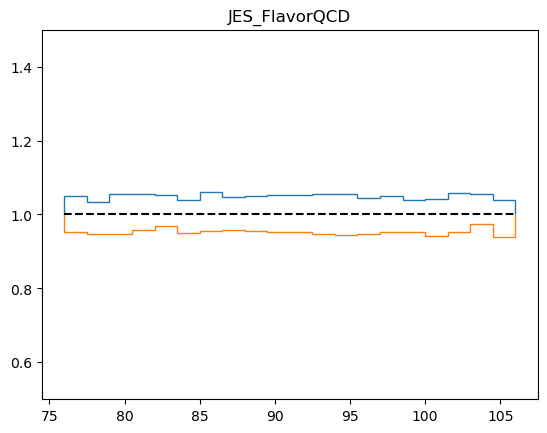

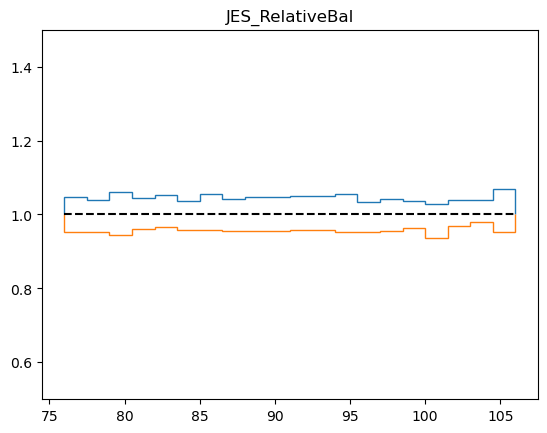

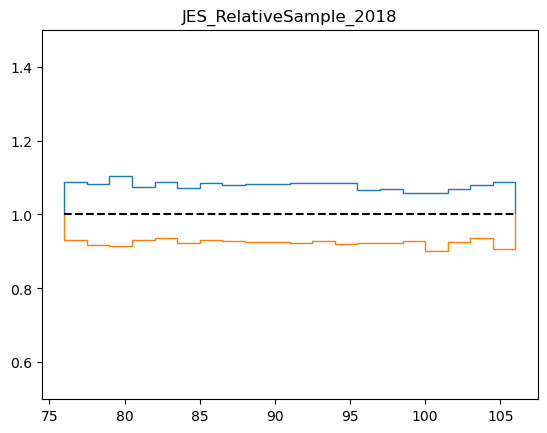

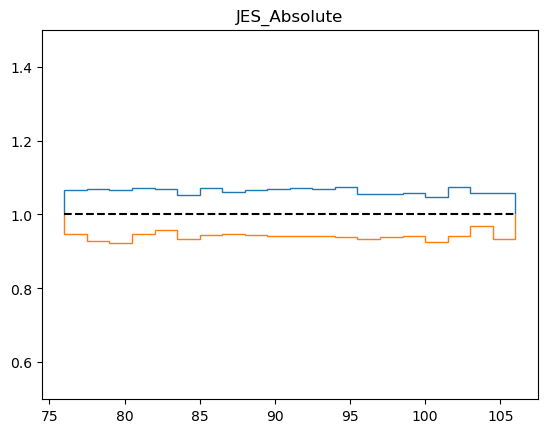

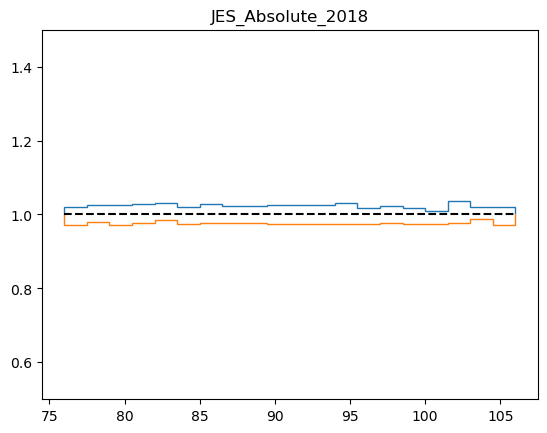

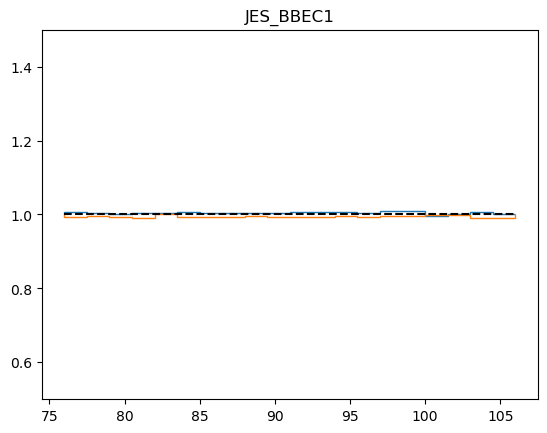

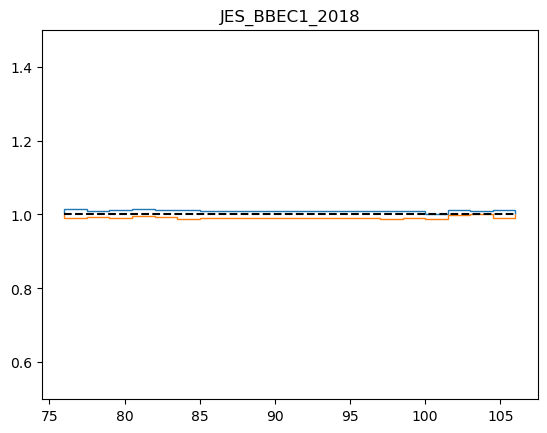

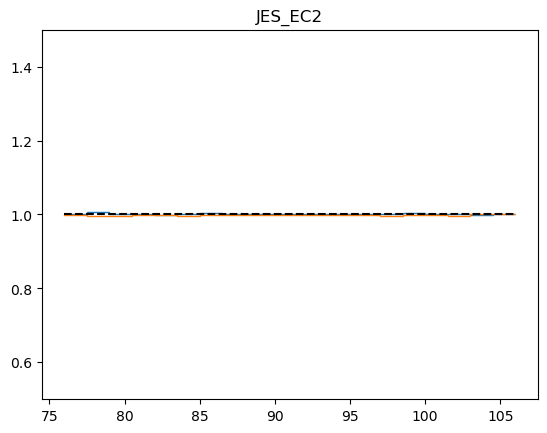

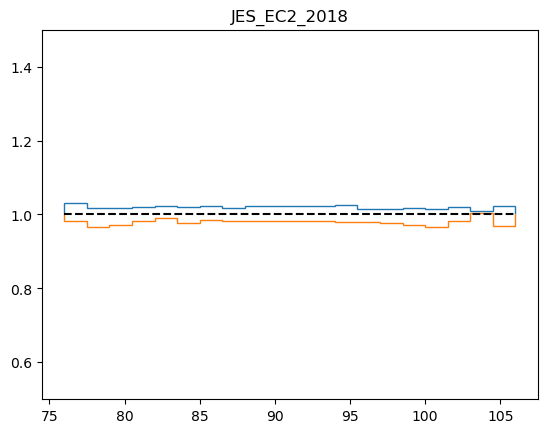

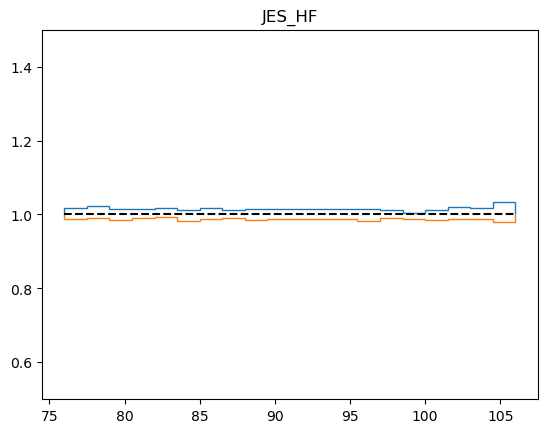

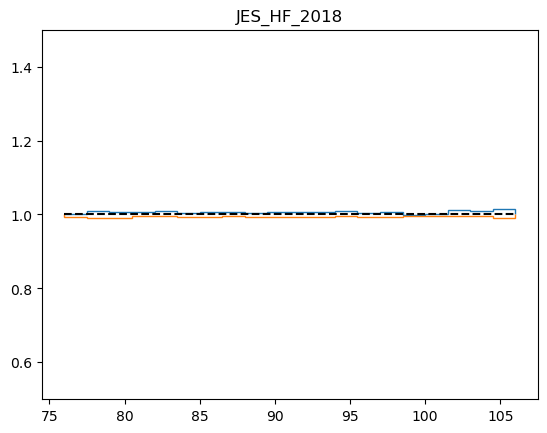

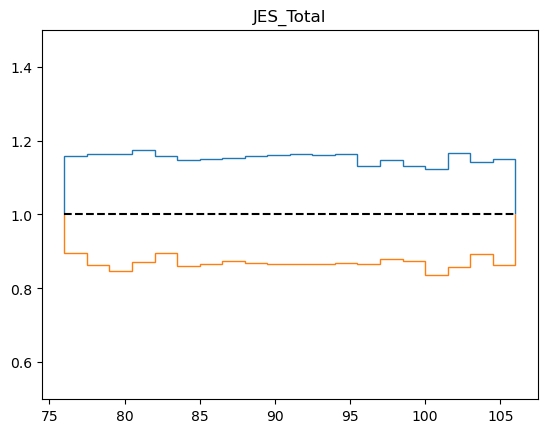

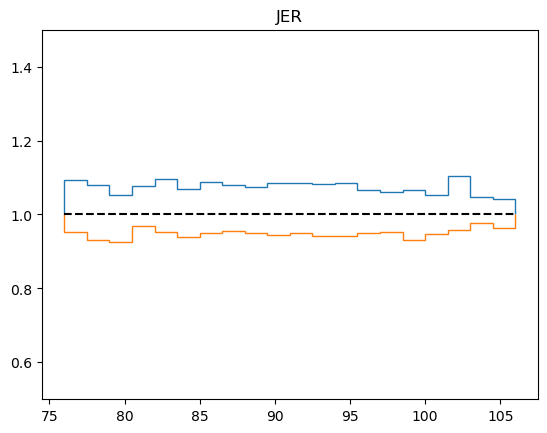

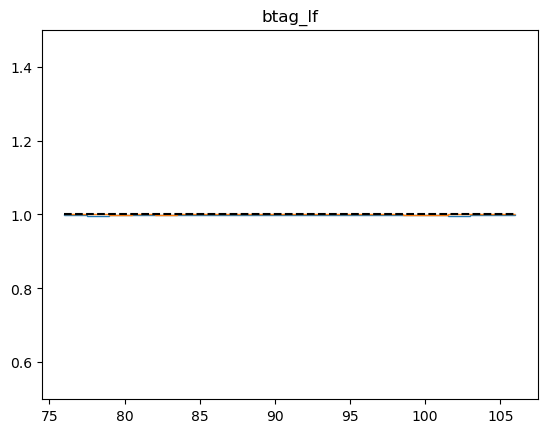

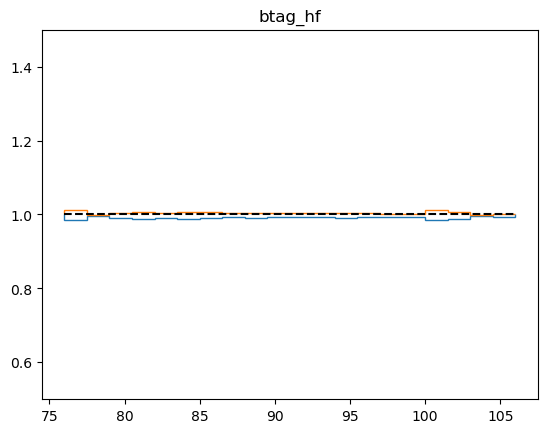

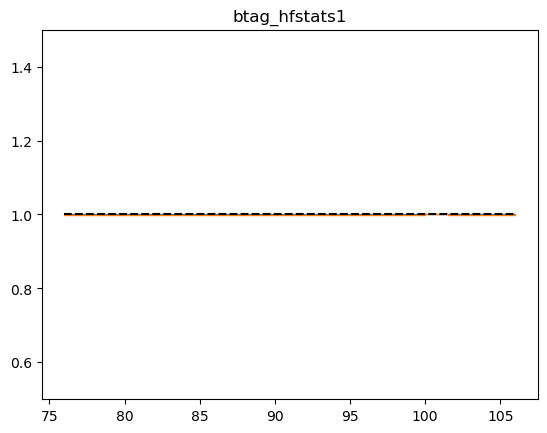

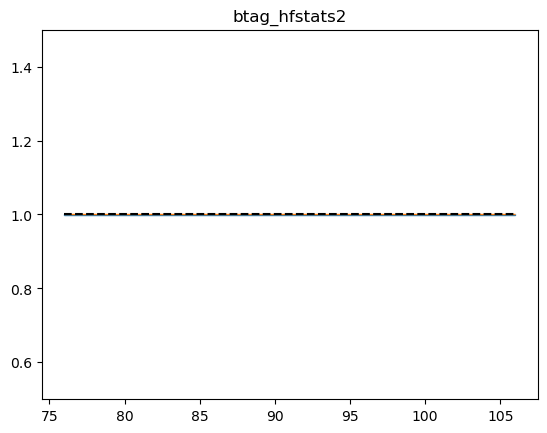

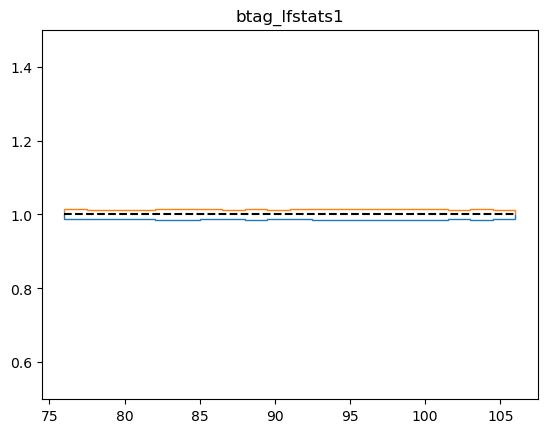

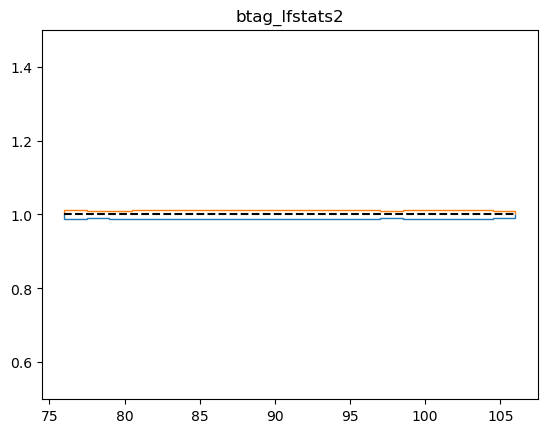

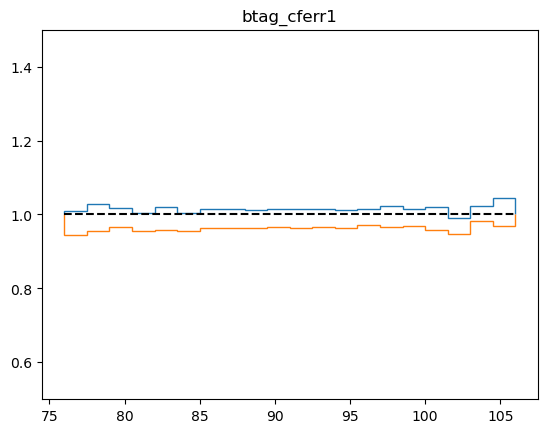

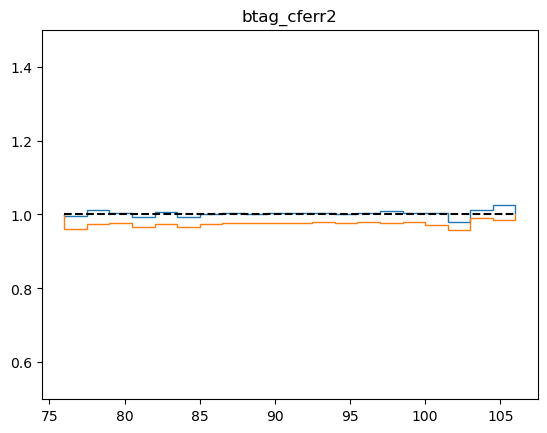

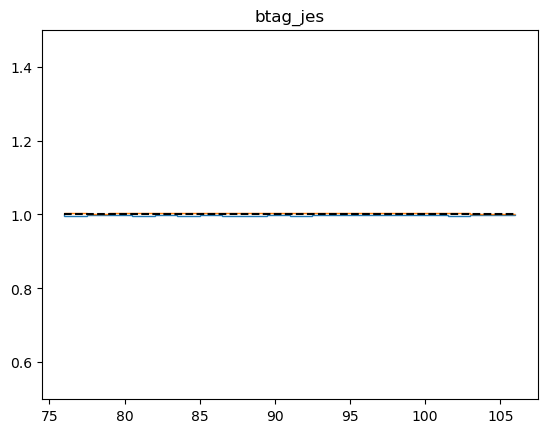

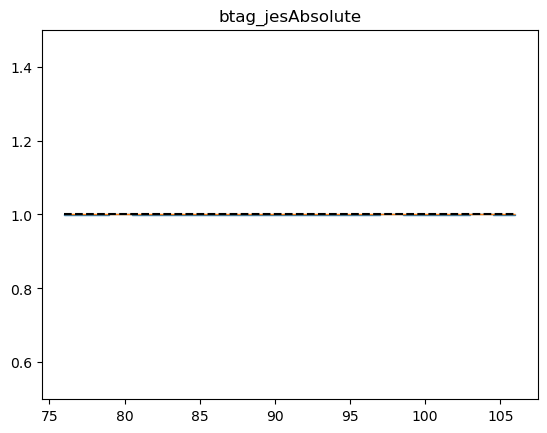

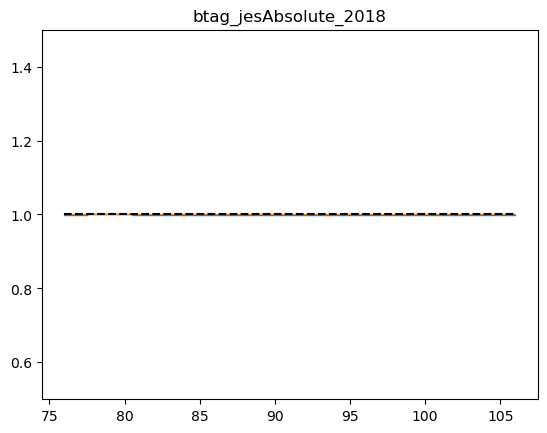

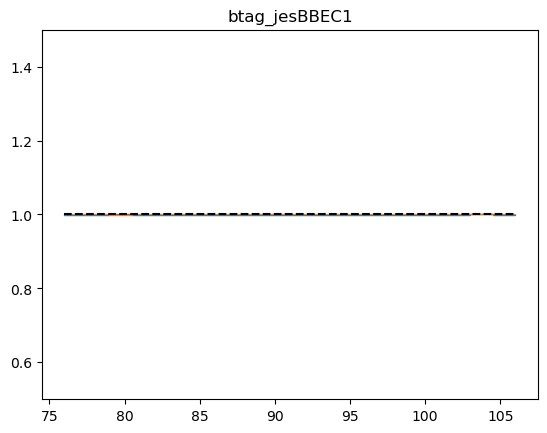

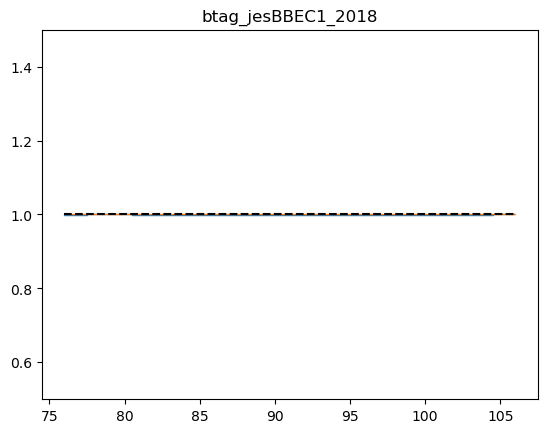

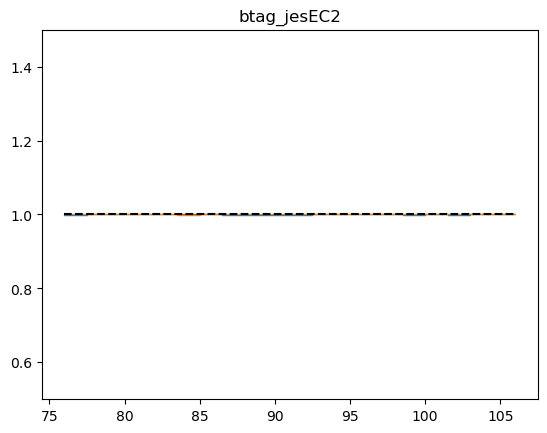

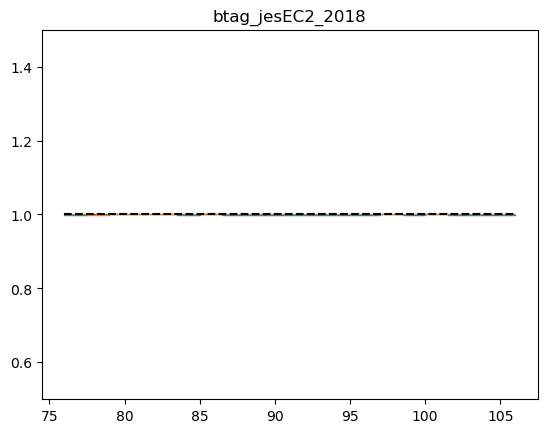

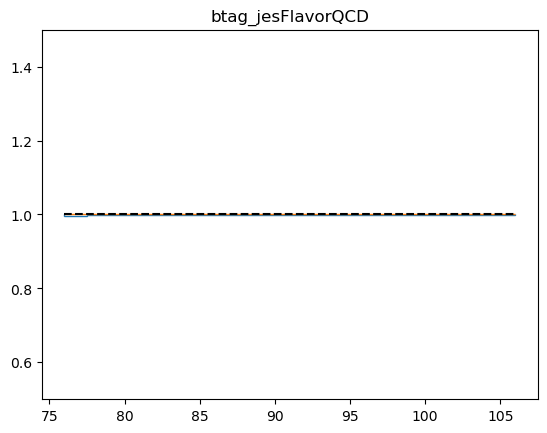

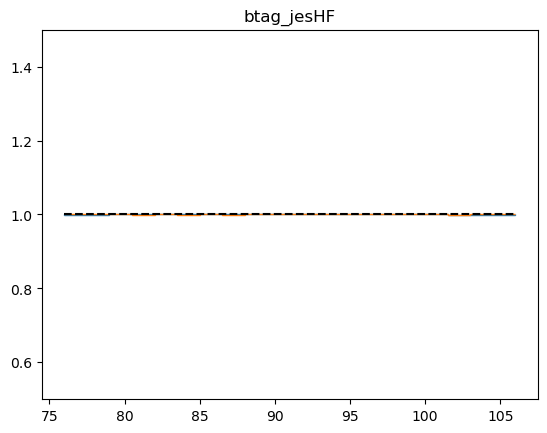

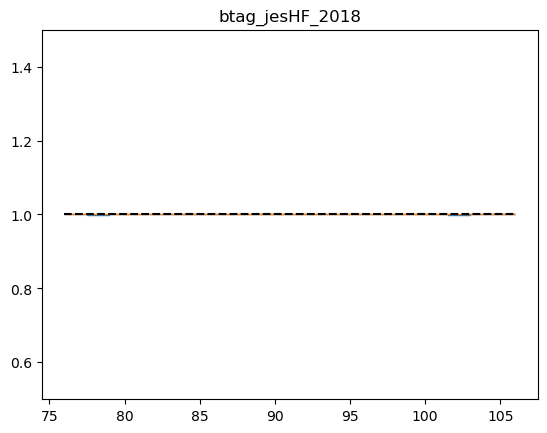

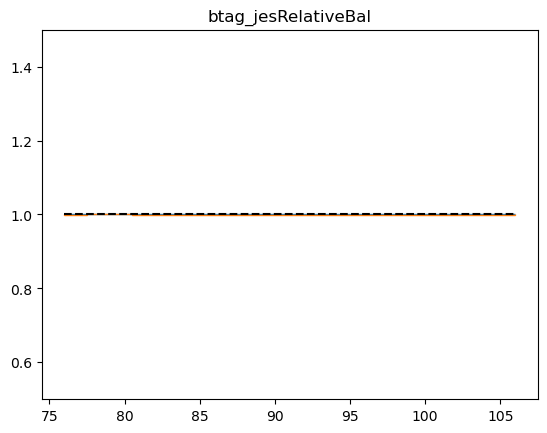

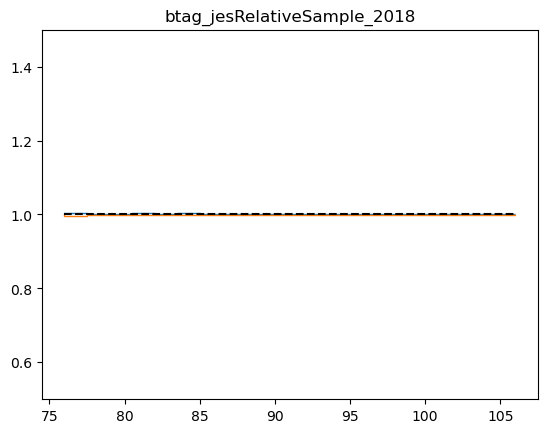

In [26]:
axis = h.axes[0]
edges = axis.edges
for variation in variations:
    plt.figure()
    plt.title(variation)
    plt.stairs(histos[f"{variation}_up"] / histos["nom"], edges, baseline=1.0)
    plt.stairs(histos[f"{variation}_down"] / histos["nom"], edges, baseline=1.0)
    plt.ylim(0.5, 1.5)
    plt.plot(edges, np.ones_like(edges), color="black", linestyle="dashed")